 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [57]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [58]:
# Reading whale returns
path_filenm_whale = Path('Starter_Code/Resources/whale_returns.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object
whale_returns_df = pd.read_csv(path_filenm_whale, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
# Inspect raw dataframe
print(whale_returns_df.info())
#print(whale_returns_df.dtypes)
print(whale_returns_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
None
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 .

In [34]:
# Count nulls
#print(whale_returns_df.isnull())
whale_returns_null_counts = whale_returns_df.isnull().sum()
print(f"whale_returns.csv null counts:\n{whale_returns_null_counts}")
#print(whale_returns_df.isnull().value_counts())

whale_returns.csv null counts:
Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [63]:
# Drop nulls (testing alternative order of copy() method on original dataframe)
#whale_returns_clean_df2 = whale_returns_df.copy().dropna()
#print(whale_returns_clean_df)
#whale_returns_clean_null_counts = whale_returns_clean_df.isnull().sum()
#print(f"whale_returns_clean_df null counts:\n{whale_returns_clean_null_counts}")
#whale_returns_clean_df2

In [73]:
# Drop nulls
whale_returns_clean_df = whale_returns_df.dropna().copy()
print(whale_returns_clean_df)
print(whale_returns_clean_df.info(),'\n')
whale_returns_clean_null_counts = whale_returns_clean_df.isnull().sum()
print(f"whale_returns_clean_df null counts:\n{whale_returns_clean_null_counts}")

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [14]:
# Reading algorithmic returns
path_filenm_algo = Path('Starter_Code/Resources/algo_returns.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object
algo_returns_df = pd.read_csv(path_filenm_algo, index_col='Date', infer_datetime_format=True, parse_dates=True)
# Inspect raw dataframe
print(algo_returns_df.info())
#print(aglo_returns_df.dtypes)
print(algo_returns_df.head(20))
print(algo_returns_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
None
              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
2014-06-12 -0.000028 -0.003841
2014-06-13  0.001917 -0.000814
2014-06-16  0.001084  0.001831
2014-06-17  0.000922  0.006870
2014-06-18 -0.006303  0.007228
2014-06-19 -0.000853  0.003989
2014-06-20  0.006398  0.003928
2014-06-23 -0.004532 -0.000615
2014-06-24  0.011861 -0.009389


In [15]:
# Count nulls
print(algo_returns_df.isnull())
algo_returns_null_counts = algo_returns_df.isnull().sum()
print(f"algo_returns.csv null counts:\n{algo_returns_null_counts}")
#print(algo_returns_df.isnull().value_counts())

            Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]
algo_returns.csv null counts:
Algo 1    0
Algo 2    6
dtype: int64


In [72]:
# Drop nulls
algo_returns_clean_df = algo_returns_df.dropna().copy()
print(algo_returns_clean_df)
print(algo_returns_clean_df.info(),'\n')
algo_returns_clean_null_counts = algo_returns_clean_df.isnull().sum()
print(f"algo_returns_clean_df null counts:\n{algo_returns_clean_null_counts}")

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB
None 

algo_returns_clean_df null counts:
Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [3]:
# Reading S&P 500 Closing Prices
path_filenm_sp500 = Path('Starter_Code/Resources/sp500_history.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object, and sort index ascending
sp500_price_close_df = pd.read_csv(path_filenm_sp500, index_col = 'Date', infer_datetime_format=True, parse_dates=True).sort_index(ascending = True)
# Inspect raw dataframe
print(sp500_price_close_df.info())
print(sp500_price_close_df.dtypes)
print(sp500_price_close_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None
Close    object
dtype: object
               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [28]:
# Check Data Types
print(sp500_price_close_df.info())
print(sp500_price_close_df.dtypes)
print(sp500_price_close_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None
Close    object
dtype: object
               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [237]:
# Fix Data Types
# Remove $ formatting from 'Close' prices columnn
# Convert 'Close' prices from string to float
sp500_price_close_clean_df = sp500_price_close_df.copy()
#print(sp500_price_close_df.Close.str.replace('$', '').astype(float))
sp500_price_close_clean_df.Close = sp500_price_close_clean_df.Close.str.replace('$', '').astype(float)
print(sp500_price_close_clean_df.info())
print(sp500_price_close_clean_df)
# Inspect data types after 'Close' prices formatting and data type conversion
#print(sp500_price_close_clean_df.info())
#print(sp500_price_close_clean_df.dtypes)
#print(sp500_price_close_clean_df)

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...  

/var/folders/vs/xqw7pdh1517fh7rzhwn16hhm0000gn/T/ipykernel_50102/2801590947.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  print(sp500_price_close_df.Close.str.replace('$', '').astype(float))
/var/folders/vs/xqw7pdh1517fh7rzhwn16hhm0000gn/T/ipykernel_50102/2801590947.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_price_close_clean_df.Close = sp500_price_close_clean_df.Close.str.replace('$', '').astype(float)


In [51]:
# Calculate Daily Returns
sp500_returns_df = sp500_price_close_clean_df.pct_change()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [79]:
# Drop nulls
sp500_returns_clean_df = sp500_returns_df.dropna().copy()
print(sp500_returns_clean_df.info())
sp500_returns_clean_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [80]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_clean_df = sp500_returns_clean_df.rename(columns={'Close': 'SP500'})
sp500_returns_clean_df

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [81]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Read in dataframes as a list to concatenate vertically
# axis=1 equivalent to axis='columns'; axis=0 equivalent to axis='rows'
returns_df = pd.concat([whale_returns_clean_df, algo_returns_clean_df,sp500_returns_clean_df], join='inner', axis='columns')
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Portfolios Daily Returns'}, xlabel='Date'>

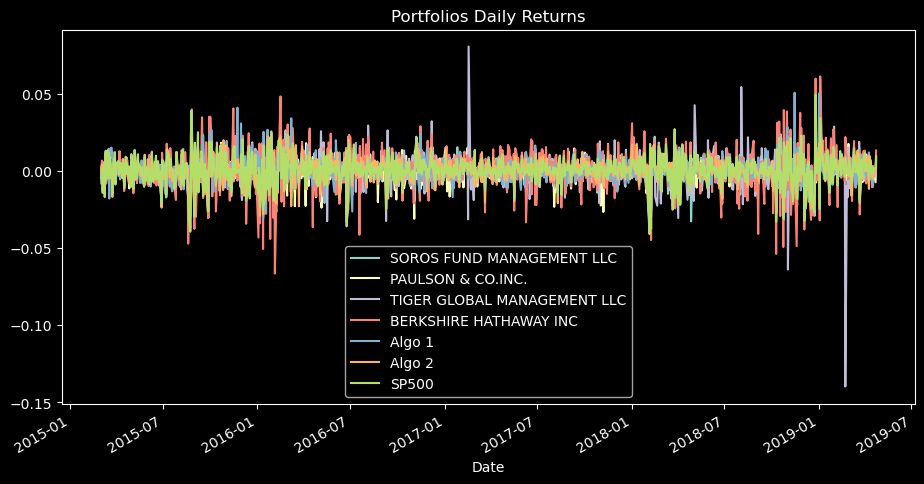

In [107]:
# Plot daily returns of all portfolios
# Plot default type: kind='line'
returns_df.plot(title='Portfolios Daily Returns', kind='line', figsize=(11,5.5))

#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   
...                               ...                 ...   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504             

<Axes: title={'center': 'Portfolios Cumulative Returns'}, xlabel='Date'>

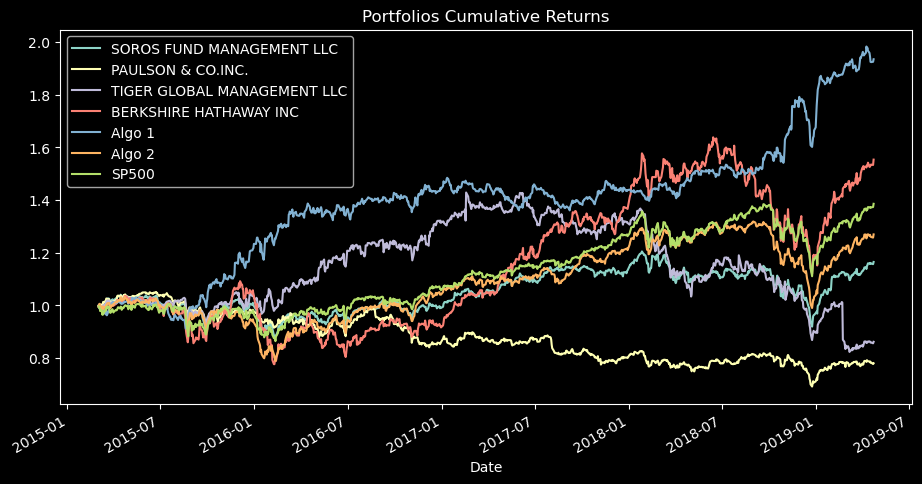

In [108]:
# Calculate cumulative returns of all portfolios
returns_cumul_df = (1+returns_df).cumprod()
print(returns_cumul_df)
# Plot cumulative returns
returns_cumul_df.plot(title='Portfolios Cumulative Returns', figsize=(11,5.5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolios Box Plots Illustrating Variability in Daily Returns'}>

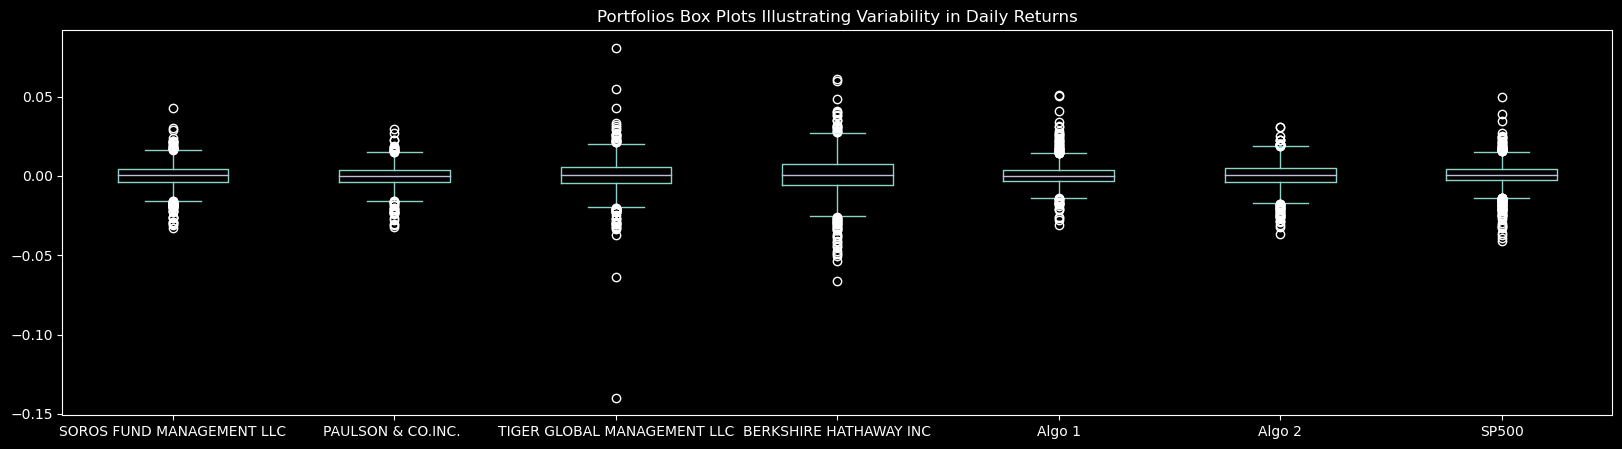

In [113]:
# Box plot to visually show risk
# Box plot of daily returns for each portfolio to illustrate variability, or risk, of returns
returns_df.plot.box(title='Portfolios Returns Box Plots Illustrating Variability in Daily Returns',figsize=(20,5))


### Calculate Standard Deviations

In [114]:
# Calculate the daily standard deviations of all portfolios
returns_daily_standard_deviation_df = returns_df.std()
returns_daily_standard_deviation_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [142]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_standard_deviation = returns_df.SP500.std()
sp500_daily_standard_deviation
# Determine which portfolios are riskier than the S&P 500
for each in returns_df:
    #print(each)
    if each != 'SP500':
        #print(each)
        if returns_df[each].std() > sp500_daily_standard_deviation:
            #print('works')
            print(f"{each}'s portfolio was riskier than the S&P 500, as measured by a daily standard deviation of {returns_df[each].std():.4f} vs. the S&P500's of {sp500_daily_standard_deviation:.4f}, over the time period examined. \n")

TIGER GLOBAL MANAGEMENT LLC's portfolio was riskier than the S&P 500, as measured by a daily standard deviation of 0.0109 vs. the S&P500's of 0.0086, over the time period examined. 

BERKSHIRE HATHAWAY INC's portfolio was riskier than the S&P 500, as measured by a daily standard deviation of 0.0129 vs. the S&P500's of 0.0086, over the time period examined. 



### Calculate the Annualized Standard Deviation

In [143]:
# Calculate the annualized standard deviation (252 trading days)
# Standard deviation is not additive, whereas Variance is additive.  Formula used: Daily_Variance (or Daily Standard Deviation squared) times 252 trading days, equals Annualized Variance.
# Square root of Annualized Variance yields Annualized Standard Deviation.  Numpy sqrt function not necessary.
returns_annualized_standard_deviation_df = (((returns_daily_standard_deviation_df)**2)*252)**(1/2)
returns_annualized_standard_deviation_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Portfolios Rolling 21-Day Daily Standard Deviation'}, xlabel='Date'>

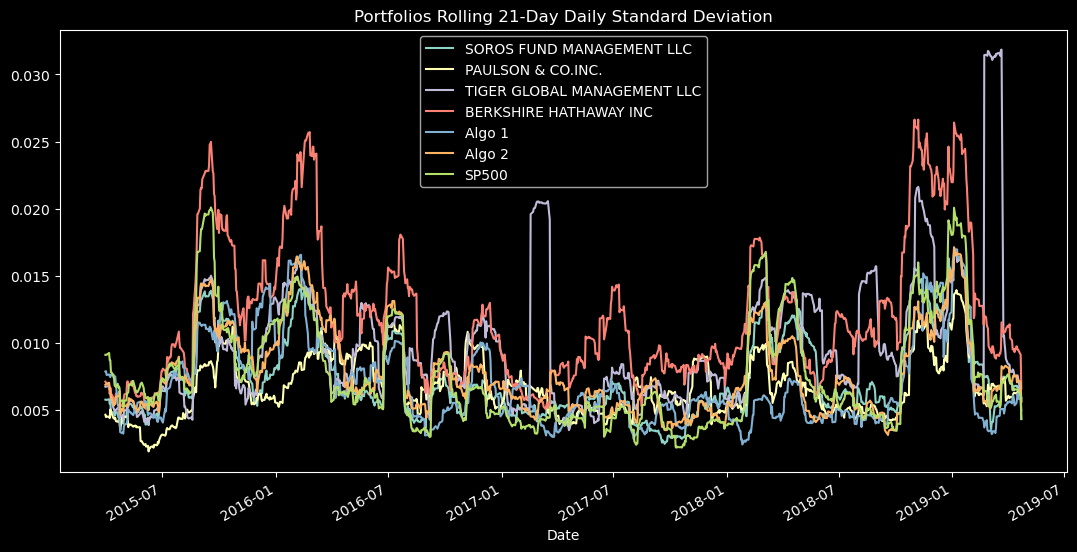

In [154]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#rolling_21_day_standard_deviation_dftest = returns_df.rolling(window=21).std()
#rolling_21_day_standard_deviation_dftest.head(30)
rolling_21_day_standard_deviation_df = returns_df.rolling(window=21).std().dropna().copy()
#print(rolling_21_day_standard_deviation_df)
# Plot the rolling standard deviation
rolling_21_day_standard_deviation_df.plot(title='Portfolios Rolling 21-Day Daily Standard Deviation', figsize=(13,6.5))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


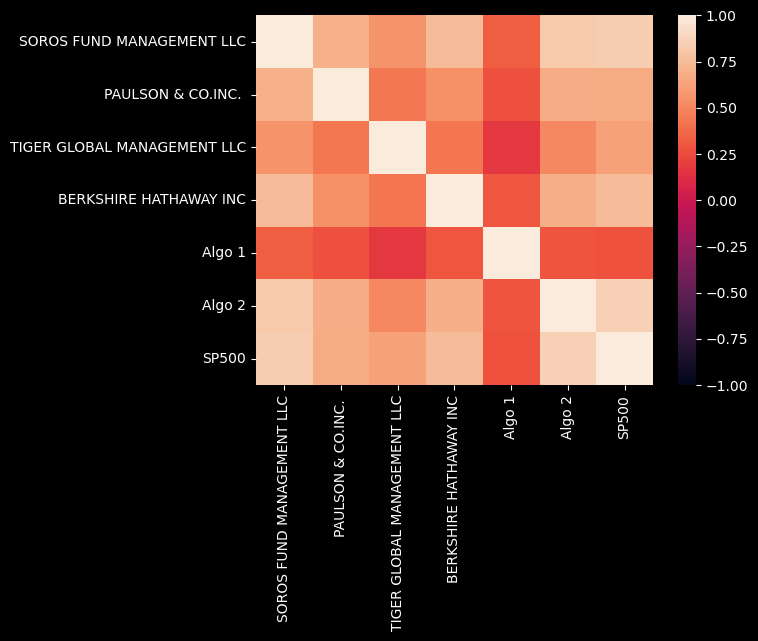

In [162]:
# Calculate the correlation
returns_correlation_df = returns_df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(returns_correlation_df, vmin=-1, vmax=1)
returns_correlation_df

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

SOROS FUND MANAGEMENT LLC covariance with S&P 500 was: 5.658503197203612e-05
PAULSON & CO.INC.  covariance with S&P 500 was: 4.023315093652716e-05
TIGER GLOBAL MANAGEMENT LLC covariance with S&P 500 was: 5.8141830323050785e-05
BERKSHIRE HATHAWAY INC covariance with S&P 500 was: 8.302834941861666e-05
Algo 1 covariance with S&P 500 was: 1.8217749991632744e-05
Algo 2 covariance with S&P 500 was: 6.12793237414499e-05
SP500 covariance with S&P 500 was: 7.316632424648712e-05

The variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = 7.316632424648712e-05
True 

{'SOROS FUND MANAGEMENT LLC': 0.7733753547794618, 'PAULSON & CO.INC. ': 0.5498861853574507, 'TIGER GLOBAL MANAGEMENT LLC': 0.7946528805681025, 'BERKSHIRE HATHAWAY INC': 1.1347891297491692, 'Algo 1': 0.24899091459425637, 'Algo 2': 0.8375345402757753, 'SP500': 1.0}

    SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
0                   0.773375            0.549886              

<Axes: title={'center': 'Portfolio Betas Relative to Benchmark S&P 500'}>

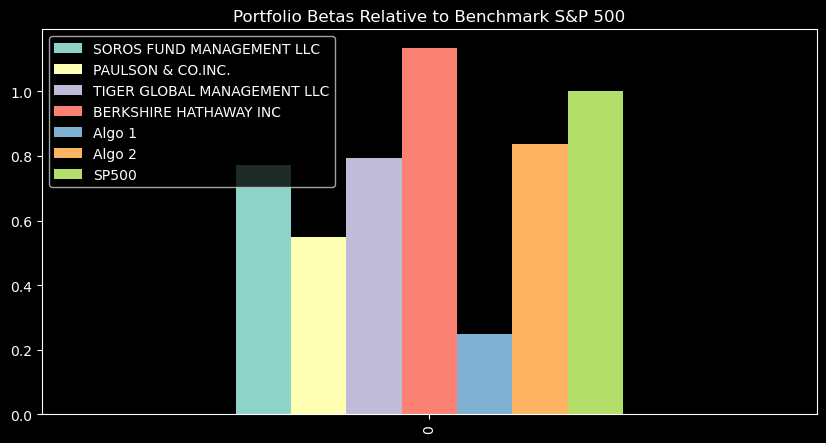

In [212]:
# Calculate covariance of a single portfolio
cov={} 
for each in returns_df:
    cov[each] = returns_df[each].cov(returns_df['SP500'])
    print(f"{each} covariance with S&P 500 was: {cov[each]}")    
    # Could prettify by putting covariance dictionary into dataframe
#print(cov)

# Calculate variance of S&P 500
print(f"\nThe variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = {cov['SP500']}")
# Confirm S&P 500 variance via the traditional calculation is equivalent to calculation above of S&P 500 covariance with itself
sp500_var = cov['SP500']
print(returns_df.SP500.var()==cov['SP500'],"\n") # Returns 'True', perfect.

# Computing beta
# Beta = cov(x,m)/v(m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
beta={}
for each in cov:
    beta[each] = cov[each]/sp500_var
print(beta)

# Plot beta
# Prettify by putting beta dictionary into dataframe
beta_df = pd.DataFrame([beta]) # Explicity wrapped the dictionary in a list, 1 of 3 methods to otherwise circumvent conversion to dataframe error raised 'ValueError: If using all scalar values, you must pass an index' (see https://www.statology.org/valueerror-if-using-all-scalar-values-you-must-pass-an-index/)
print("\n",beta_df)
beta_df.plot(kind='bar', figsize=(10,5), title='Portfolio Betas Relative to Benchmark S&P 500')

# Plot beta trend (see next Notebook cell below)


The rolling 21-day variance of the S&P 500 is the same as the rolling 21-day covariance of the S&P 500 with itself = 7.316632424648712e-05
Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500', 'SOROS FUND MANAGEMENT LLC_beta',
       'PAULSON & CO.INC. _beta', 'TIGER GLOBAL MANAGEMENT LLC_beta',
       'BERKSHIRE HATHAWAY INC_beta', 'Algo 1_beta', 'Algo 2_beta',
       'SP500_beta'],
      dtype='object')


<Axes: title={'center': 'Portfolio Rolling 21-Day Betas Relative to Benchmark S&P 500'}, xlabel='Date'>

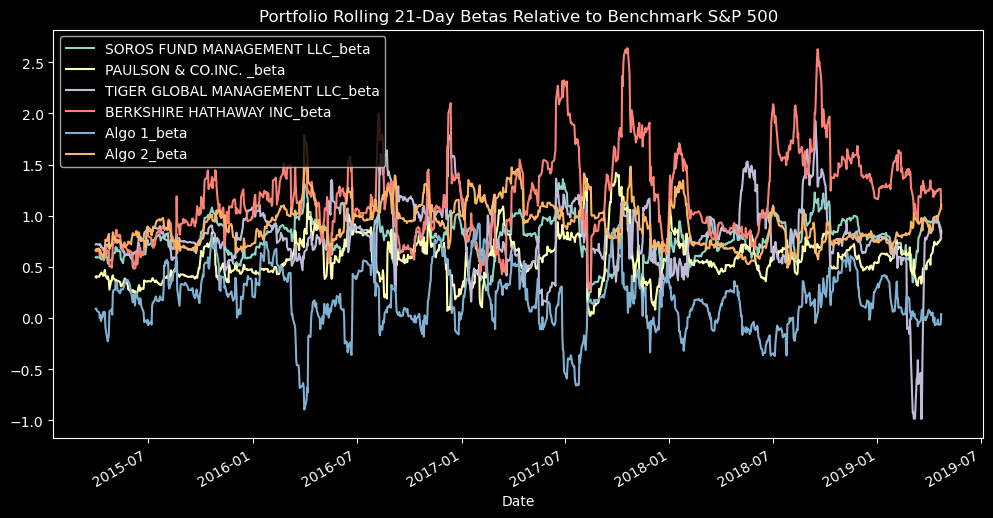

In [235]:
# Plot beta trend (work in progress)
rolling_21_day_cov={} # Using nifty dictionary
for each in returns_df:
    rolling_21_day_cov[each] = returns_df[each].rolling(window=21).cov(returns_df['SP500'])
    #print(f"{each} rolling 21-day covariance with S&P 500 was: {rolling_21_day_cov[each]}") # Nifty dictionary key-value lookup. 
    # Could prettify by putting covariance dictionary into dataframe
#print(rolling_21_day_cov)
rolling_21_day_cov_clean_df = pd.DataFrame(rolling_21_day_cov).dropna().copy() # Since not passing all scalar values, did not have to pass an index by forcing one through wrapping dictionary in list within pd.DataFrame function.
#rolling_21_day_cov_clean_df
#rolling_21_day_cov_df = pd.DataFrame([rolling_21_day_cov]).dropna().copy()
#rolling_21_day_cov_clean_df

# Calculate variance of S&P 500
print(f"\nThe rolling 21-day variance of the S&P 500 is the same as the rolling 21-day covariance of the S&P 500 with itself = {cov['SP500']}")
sp500_rolling_21_day_var = rolling_21_day_cov['SP500']

# Computing beta # Lesson here versus previous Notebook cell above is to get dictionary into dataframe as soon as possible, obviates need for messing with another dictionary in the beta routine below.
# Beta = cov(x,m)/v(m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
for each in rolling_21_day_cov_clean_df:
    rolling_21_day_cov_clean_df[f"{each}_beta"] = rolling_21_day_cov[each]/rolling_21_day_cov['SP500']
#print(rolling_21_day_cov_clean_df)
rolling_21_day_cov_clean_df

# Plot beta
# Columns to plot
# print(rolling_21_day_cov_clean_df.columns)
rolling_21_day_cov_clean_df[['SOROS FUND MANAGEMENT LLC_beta',
       'PAULSON & CO.INC. _beta', 'TIGER GLOBAL MANAGEMENT LLC_beta',
       'BERKSHIRE HATHAWAY INC_beta', 'Algo 1_beta', 'Algo 2_beta']].plot(kind='line', figsize=(12,6), title='Portfolio Rolling 21-Day Betas Relative to Benchmark S&P 500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
# Would calculate exponential moving average using pandas 'ewm' function.
# Code example: 
    # `returns_df['SOROS FUND MANAGEMENT LLC'].ewm()`
    # Can specify half-life, etc., as arguments to 'ewm' function.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [243]:
# Annualized Sharpe Ratios
# Sharpe Ratio = (Annualized Portfolio Return - Annualized Risk-Free Rate of Return) / Annualized Portfolio Standard Deviation - Annualized Risk-Free Standard Deviation
# We will assume the risk-free (typically 10-yr Treasury bond) rate of return and risk are zero.  Therefore, simplified Sharpe Ratio = Annualized Portfolio Return / Annualized Portfolio Standard Deviation
returns_sharpe_ratio = returns_df.mean()*252 / ((((returns_df.std())**2)*252)**(1/2)) # annualized_variance^(1/2) = ((daily_standard_deviation^2)*252)^(1/2) = annualized_standard_deviation
returns_sharpe_ratio
print(returns_sharpe_ratio)
print("\nPaulson & Co. and Tiger Global Management porfolios actually lost money in the period, as evidenced by negative Sharpe Ratios!")

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

Paulson & Co. and Tiger Global Management porfolios actually lost money in the period, as evidenced by negative Sharpe Ratios!


                             Sharpe Ratio
SOROS FUND MANAGEMENT LLC        0.356417
PAULSON & CO.INC.               -0.483570
TIGER GLOBAL MANAGEMENT LLC     -0.121060
BERKSHIRE HATHAWAY INC           0.621810
Algo 1                           1.378648
Algo 2                           0.501364
SP500                            0.648267


<Axes: title={'center': 'Portfolios Sharpe Ratios: March 2015 - April 2019'}>

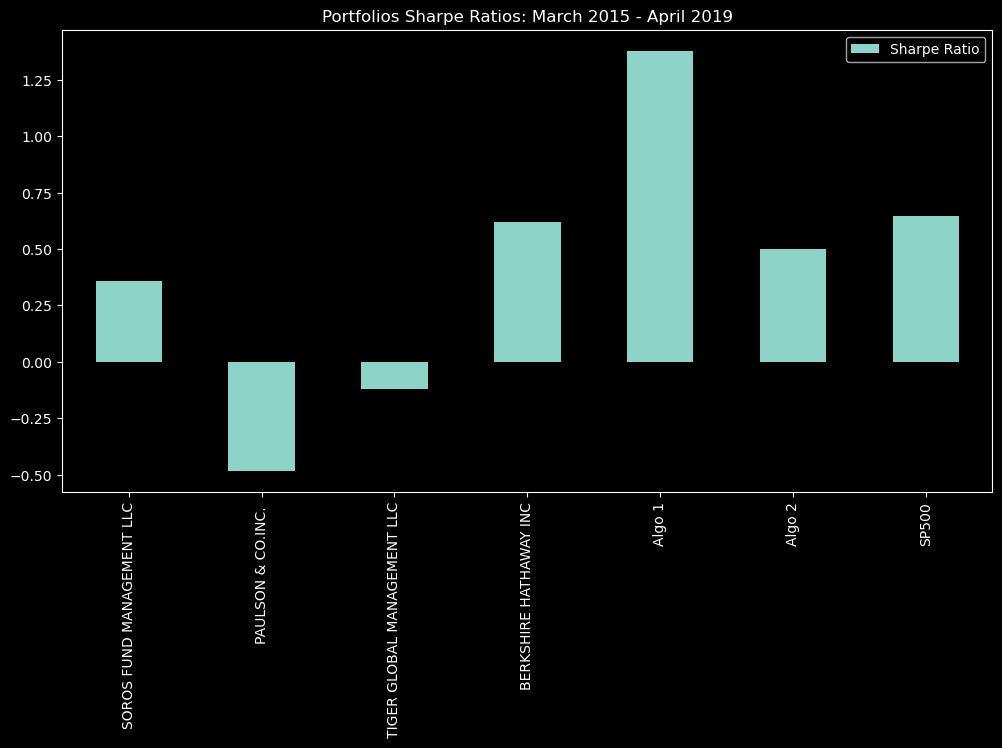

In [260]:
# Visualize the sharpe ratios as a bar plot
returns_sharpe_ratio_df=pd.DataFrame(returns_sharpe_ratio, columns=(['Sharpe Ratio']))
print(returns_sharpe_ratio_df)
returns_sharpe_ratio_df.plot(kind='bar', title='Portfolios Sharpe Ratios: March 2015 - April 2019', rot=90, figsize=(12,6))
# Bars are monochromatic because Sharpe Ratio is listed in a single column as a single series, rather than in individual columns for each portfolio, or multiple series, which by default would plot with different color for each

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

1) Algo 1 outperforms all portfolios, including the S&P 500 index benchmark, as measured by the largest return-to-risk metric, or Sharpe Ratio, of 1.38
2) Algo 2, with a moderate Sharpe Ratio of 0.50, outperformed only Soros, Tiger, and Paulson portfolios, while it underperformed Algo 1, Berkshire, and the S&P 500, as measured by the Sharpe Ratio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [286]:
# Reading data from 1st stock
# Custom stocks chosen [Name (Ticker Symbol)]: Exxon Mobil (XOM), Jefferies Financial Group (JEF), Microsoft (MSFT), Johnson & Johnson (JNJ), Tesla (TSLA)
# Data period July 1, 2021 - June 30, 2023
# Data c.f. https://finance.yahoo.com/quote.  Adjusted Close price used, as it reflects historical dividends, stock splits, and other adjustments.
file_nm = 'custom_stocks_historical.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
custom_stocks_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(custom_stocks_prices_close_df) #Inspect file read in
xom_price_close = custom_stocks_prices_close_df['XOM Adj Close']
xom_price_close

            XOM Adj Close  JEF Adj Close  TSLA Adj Close  JNJ Adj Close  \
Date                                                                      
2021-07-01      58.187599      30.280468      225.973328     157.381927   
2021-07-02      58.104820      30.155191      226.300003     160.245850   
2021-07-06      56.449150      29.895699      219.860001     159.288040   
2021-07-07      55.566128      29.224588      214.883331     160.653625   
2021-07-08      55.317772      27.748150      217.603333     160.340668   
...                   ...            ...             ...            ...   
2023-06-26     104.290001      31.530001      241.050003     163.630005   
2023-06-27     104.550003      31.940001      250.210007     163.289993   
2023-06-28     105.400002      33.070000      256.239990     162.960007   
2023-06-29     106.699997      33.369999      257.500000     164.100006   
2023-06-30     107.250000      33.169998      261.769989     165.520004   

            MSFT Adj Clo

Date
2021-07-01     58.187599
2021-07-02     58.104820
2021-07-06     56.449150
2021-07-07     55.566128
2021-07-08     55.317772
                 ...    
2023-06-26    104.290001
2023-06-27    104.550003
2023-06-28    105.400002
2023-06-29    106.699997
2023-06-30    107.250000
Name: XOM Adj Close, Length: 503, dtype: float64

In [287]:
# Reading data from 2nd stock
jef_price_close = custom_stocks_prices_close_df['JEF Adj Close']
jef_price_close

Date
2021-07-01    30.280468
2021-07-02    30.155191
2021-07-06    29.895699
2021-07-07    29.224588
2021-07-08    27.748150
                ...    
2023-06-26    31.530001
2023-06-27    31.940001
2023-06-28    33.070000
2023-06-29    33.369999
2023-06-30    33.169998
Name: JEF Adj Close, Length: 503, dtype: float64

In [288]:
# Reading data from 3rd stock
tsla_price_close = custom_stocks_prices_close_df['TSLA Adj Close']
tsla_price_close

Date
2021-07-01    225.973328
2021-07-02    226.300003
2021-07-06    219.860001
2021-07-07    214.883331
2021-07-08    217.603333
                 ...    
2023-06-26    241.050003
2023-06-27    250.210007
2023-06-28    256.239990
2023-06-29    257.500000
2023-06-30    261.769989
Name: TSLA Adj Close, Length: 503, dtype: float64

In [289]:
# Reading data from 4th stock
jnj_price_close = custom_stocks_prices_close_df['JNJ Adj Close']
jnj_price_close

Date
2021-07-01    157.381927
2021-07-02    160.245850
2021-07-06    159.288040
2021-07-07    160.653625
2021-07-08    160.340668
                 ...    
2023-06-26    163.630005
2023-06-27    163.289993
2023-06-28    162.960007
2023-06-29    164.100006
2023-06-30    165.520004
Name: JNJ Adj Close, Length: 503, dtype: float64

In [290]:
# Reading data from 5th stock
msft_price_close = custom_stocks_prices_close_df['MSFT Adj Close']
msft_price_close

Date
2021-07-01    266.821075
2021-07-02    272.764557
2021-07-06    272.774475
2021-07-07    275.004486
2021-07-08    272.538696
                 ...    
2023-06-26    328.600006
2023-06-27    334.570007
2023-06-28    335.850006
2023-06-29    335.049988
2023-06-30    340.540009
Name: MSFT Adj Close, Length: 503, dtype: float64

In [328]:
# Combine all stocks in a single DataFrame
stocks_price_close_df = pd.concat([xom_price_close, jef_price_close, tsla_price_close, jnj_price_close, msft_price_close], join='inner', axis='columns')
print(stocks_price_close_df.info())
stocks_price_close_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-07-01 to 2023-06-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   XOM Adj Close   503 non-null    float64
 1   JEF Adj Close   503 non-null    float64
 2   TSLA Adj Close  503 non-null    float64
 3   JNJ Adj Close   503 non-null    float64
 4   MSFT Adj Close  503 non-null    float64
dtypes: float64(5)
memory usage: 23.6 KB
None


,XOM Adj Close,JEF Adj Close,TSLA Adj Close,JNJ Adj Close,MSFT Adj Close
Date,,,,,
2021-07-01,58.187599,30.280468,225.973328,157.381927,266.821075
2021-07-02,58.104820,30.155191,226.300003,160.245850,272.764557
2021-07-06,56.449150,29.895699,219.860001,159.288040,272.774475
2021-07-07,55.566128,29.224588,214.883331,160.653625,275.004486
2021-07-08,55.317772,27.748150,217.603333,160.340668,272.538696
...,...,...,...,...,...
2023-06-26,104.290001,31.530001,241.050003,163.630005,328.600006
2023-06-27,104.550003,31.940001,250.210007,163.289993,334.570007
2023-06-28,105.400002,33.070000,256.239990,162.960007,335.850006


In [329]:
# Reset Date index
# This is confusing, and don't believe applicable here as performed inner join on columns, not rows, as may have been assumed by this step.  However, explicit restatement of index as 'Date' in the event certain dates didn't join horizontally:
stocks_price_close_df = stocks_price_close_df.reset_index(drop=False)
print(stocks_price_close_df)
stocks_price_close_df = stocks_price_close_df.set_index(['Date'])
print(stocks_price_close_df)

          Date  XOM Adj Close  JEF Adj Close  TSLA Adj Close  JNJ Adj Close  \
0   2021-07-01      58.187599      30.280468      225.973328     157.381927   
1   2021-07-02      58.104820      30.155191      226.300003     160.245850   
2   2021-07-06      56.449150      29.895699      219.860001     159.288040   
3   2021-07-07      55.566128      29.224588      214.883331     160.653625   
4   2021-07-08      55.317772      27.748150      217.603333     160.340668   
..         ...            ...            ...             ...            ...   
498 2023-06-26     104.290001      31.530001      241.050003     163.630005   
499 2023-06-27     104.550003      31.940001      250.210007     163.289993   
500 2023-06-28     105.400002      33.070000      256.239990     162.960007   
501 2023-06-29     106.699997      33.369999      257.500000     164.100006   
502 2023-06-30     107.250000      33.169998      261.769989     165.520004   

     MSFT Adj Close  
0        266.821075  
1      

In [320]:
# Reorganize portfolio data by having a column per symbol
stocks_price_close_df = stocks_price_close_df.rename(columns={'XOM Adj Close':'XOM', 'JEF Adj Close':'JEF','TSLA Adj Close':'TSLA','JNJ Adj Close':'JNJ','MSFT Adj Close':'MSFT'})
stocks_price_close_df

,XOM,JEF,TSLA,JNJ,MSFT
Date,,,,,
2021-07-01,58.187599,30.280468,225.973328,157.381927,266.821075
2021-07-02,58.104820,30.155191,226.300003,160.245850,272.764557
2021-07-06,56.449150,29.895699,219.860001,159.288040,272.774475
2021-07-07,55.566128,29.224588,214.883331,160.653625,275.004486
2021-07-08,55.317772,27.748150,217.603333,160.340668,272.538696
...,...,...,...,...,...
2023-06-26,104.290001,31.530001,241.050003,163.630005,328.600006
2023-06-27,104.550003,31.940001,250.210007,163.289993,334.570007
2023-06-28,105.400002,33.070000,256.239990,162.960007,335.850006


In [330]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [295]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [296]:
# Join your returns DataFrame to the original returns DataFrame


In [297]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [298]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [299]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [300]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [301]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [302]:
# Calculate Annualized Sharpe Ratios


In [303]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!